In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans


In [85]:
file = "ad_campaign_performance.csv"

In [86]:
df = pd.read_csv(file)

In [87]:
df.head()

,Campaign_ID,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,CAMP-XAJI0Y,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,CAMP-6DPBHS,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,CAMP-AHXTHV,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,CAMP-3A3ZMF,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,CAMP-8MDD4V,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1


In [5]:
df.value_counts()

Campaign_ID  Budget  Duration  Platform  Content_Type  Target_Age  Target_Gender  Region   Clicks  Conversions  CTR           CPC       Conversion_Rate  Success
CAMP-00ILU6  39677   34        YouTube   Carousel      45-54       Female         US       36883   3816         92.958137     1.075753  10.346230        1          1
CAMP-OKEP7Y  11753   22        YouTube   Video         35-44       Male           Canada   16245   1556         138.220029    0.723484  9.578332         1          1
CAMP-NZEI3Z  7156    28        YouTube   Text          55+         All            Germany  7796    4912         108.943544    0.917907  63.006670        1          1
CAMP-O04K0L  41448   31        LinkedIn  Text          25-34       Male           Canada   12966   2385         31.282571     3.196668  18.394262        1          1
CAMP-O100VH  36134   38        LinkedIn  Video         35-44       Male           Canada   17381   976          48.101511     2.078937  5.615327         1          1
         

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   object 
 4   Content_Type     1000 non-null   object 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


In [7]:
content_type = df["Content_Type"].value_counts()
print(content_type)

Content_Type
Story       213
Image       210
Carousel    202
Text        200
Video       175
Name: count, dtype: int64


In [8]:
success_count = df['Success'].sum()
failed_count = len(df) - success_count

failed_campaigns = df[df["Success"] == 0]


print(f"Number of successful campaigns: {success_count}")
print(f"Number of failed campaigns: {failed_count}")
print(failed_campaigns)

Number of successful campaigns: 897
Number of failed campaigns: 103
     Campaign_ID  Budget  Duration   Platform Content_Type Target_Age  \
16   CAMP-9T84AZ    5411        57   Facebook        Video        55+   
18   CAMP-Q85JSG   39288         6    YouTube     Carousel        55+   
24   CAMP-PHT0HL   41534        57     Google        Video      25-34   
29   CAMP-3GDPPQ     289        33   Facebook         Text      18-24   
30   CAMP-0Y9DOM   19218        42  Instagram        Video      35-44   
..           ...     ...       ...        ...          ...        ...   
949  CAMP-WWG84D   48613        12   LinkedIn         Text      25-34   
952  CAMP-VFUA9B    4721        36   LinkedIn         Text        55+   
979  CAMP-ORFQLA    4732        49  Instagram         Text      25-34   
985  CAMP-TQYDSH    7661        14    YouTube         Text      45-54   
999  CAMP-CL5EFJ   35340        36    YouTube        Story      18-24   

    Target_Gender  Region  Clicks  Conversions         

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Campaign_ID      1000 non-null   object 
 1   Budget           1000 non-null   int64  
 2   Duration         1000 non-null   int64  
 3   Platform         1000 non-null   object 
 4   Content_Type     1000 non-null   object 
 5   Target_Age       1000 non-null   object 
 6   Target_Gender    1000 non-null   object 
 7   Region           1000 non-null   object 
 8   Clicks           1000 non-null   int64  
 9   Conversions      1000 non-null   int64  
 10  CTR              1000 non-null   float64
 11  CPC              1000 non-null   float64
 12  Conversion_Rate  1000 non-null   float64
 13  Success          1000 non-null   int64  
dtypes: float64(3), int64(5), object(6)
memory usage: 109.5+ KB


In [16]:
content_type_successful = df.groupby("Content_Type")["Success"].agg(["sum", "count", "mean"])
content_type_successful.columns = ['Successful_Count','Total_Campaigns', 'Success_Rate'] 

content_analysis = content_type_successful.sort_values(by="Success_Rate", ascending=False)
content_analysis

,Successful_Count,Total_Campaigns,Success_Rate
Content_Type,,,
Carousel,190,202,0.940594
Image,191,210,0.909524
Story,191,213,0.896714
Video,153,175,0.874286
Text,172,200,0.860000


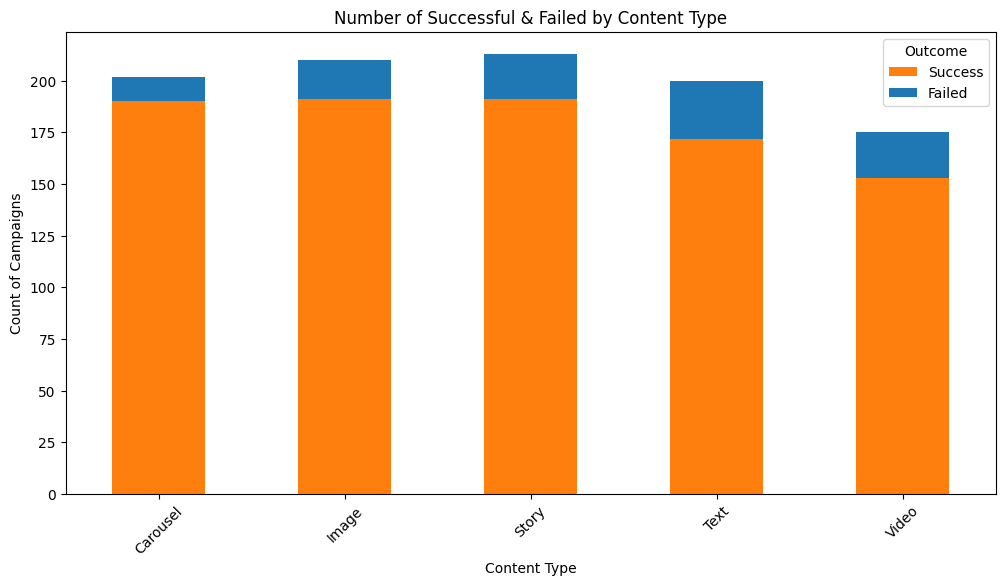

In [ ]:
#The number of successful campaigns compared to the failed campaigns by the content type
content_data = df.groupby(["Content_Type", "Success"]).size().unstack().fillna(0)

content_data = content_data[[1,0]]

content_data.plot(kind="bar", stacked=True, figsize=(12, 6), color=["#ff7f0e", "#1f77b4"])
plt.xlabel("Content Type")
plt.xticks(rotation=45)
plt.ylabel("Count of Campaigns")
plt.title("Number of Successful & Failed by Content Type")

plt.legend(["Success", "Failed"], title="Outcome")


In [42]:
platforms_used = df['Platform'].value_counts()
print(platforms_used)

Platform
YouTube      226
LinkedIn     209
Instagram    202
Facebook     193
Google       170
Name: count, dtype: int64


In [49]:
succesful_platform = df.groupby('Platform')['Success'].agg(['sum', 'count', 'mean'])
succesful_platform['mean'] = succesful_platform['mean'] * 100
succesful_platform.columns = ['Successful', 'Total', 'Average']


succesful_platform

,Successful,Total,Average
Platform,,,
Facebook,177,193,91.709845
Google,158,170,92.941176
Instagram,175,202,86.633663
LinkedIn,188,209,89.952153
YouTube,199,226,88.053097


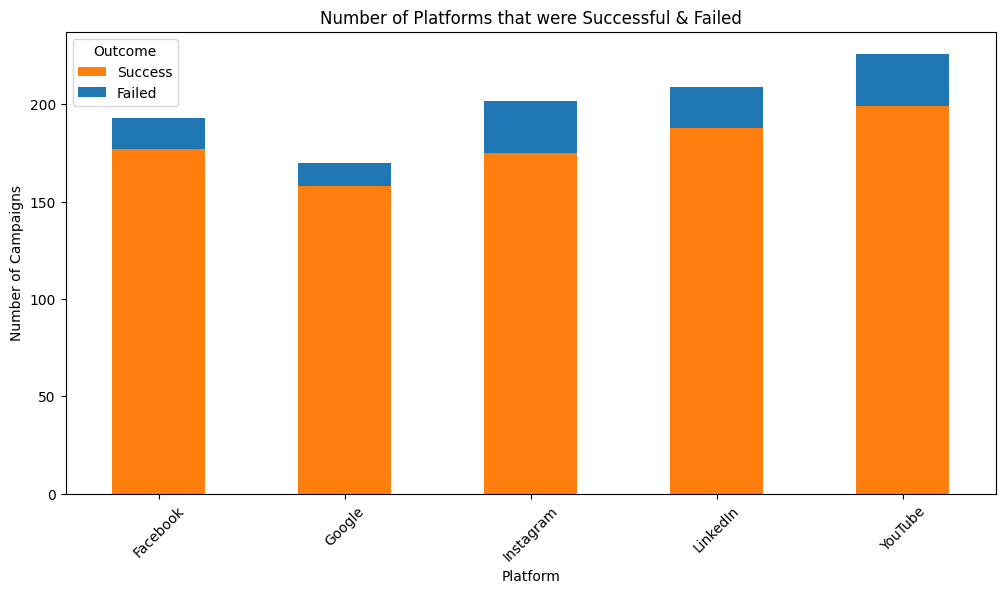

In [60]:
platform_data = df.groupby(['Platform', 'Success']).size().unstack().fillna(0)

platform_data = platform_data[[1, 0]]

platform_data.plot(kind='bar', figsize=(12, 6), stacked=True, color=['#ff7f0e', '#1f77b4'])
plt.title("Number of Platforms that were Successful & Failed")
plt.xlabel("Platform")
plt.ylabel("Number of Campaigns")
plt.xticks(rotation=45)
plt.legend(['Success', 'Failed'], title='Outcome')

plt.show()


In [88]:
df_copy = df.copy()
df_copy['Id'] = df.index

In [90]:
df_copy = df_copy.drop("Campaign_ID", axis=1)
df_copy

,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success,Id
0,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1,0
1,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1,1
2,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1,2
3,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1,3
4,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,15828,13,YouTube,Carousel,18-24,All,US,20836,3524,131.640131,0.759647,16.913035,1,995
996,23375,60,Instagram,Story,55+,Male,India,44615,1764,190.866310,0.523927,3.953827,1,996
997,6838,25,YouTube,Story,35-44,Female,UK,20233,3292,295.890611,0.337963,16.270449,1,997
998,16013,28,Google,Image,55+,All,India,49820,2489,311.122213,0.321417,4.995986,1,998


In [92]:
columns = ['Id'] + [col for col in df_copy.columns if col != 'Id']

df_copy = df_copy[columns]
df_copy

,Id,Budget,Duration,Platform,Content_Type,Target_Age,Target_Gender,Region,Clicks,Conversions,CTR,CPC,Conversion_Rate,Success
0,0,15895,39,Instagram,Video,35-44,Female,US,48297,2116,303.850267,0.329109,4.381225,1
1,1,960,8,LinkedIn,Video,45-54,Female,UK,15097,2340,1572.604167,0.063589,15.499768,1
2,2,38258,54,YouTube,Image,35-44,All,US,8134,2740,21.260913,4.703467,33.685763,1
3,3,44832,28,Facebook,Text,25-34,Female,US,21801,4277,48.628212,2.056419,19.618366,1
4,4,11384,36,Google,Story,18-24,All,UK,16503,1488,144.966620,0.689814,9.016542,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,15828,13,YouTube,Carousel,18-24,All,US,20836,3524,131.640131,0.759647,16.913035,1
996,996,23375,60,Instagram,Story,55+,Male,India,44615,1764,190.866310,0.523927,3.953827,1
997,997,6838,25,YouTube,Story,35-44,Female,UK,20233,3292,295.890611,0.337963,16.270449,1
998,998,16013,28,Google,Image,55+,All,India,49820,2489,311.122213,0.321417,4.995986,1
